In [1]:
!ls './Reports/gender/b5post_pt'

ls: cannot access './Reports/gender/b5post_pt': No such file or directory


In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def get_avg(histories, his_key):
    tmp = []
    for history in histories:
        tmp.append(history[his_key][np.argmin(history['val_loss'])])
    return np.mean(tmp)

def train_val_metrics(histories):
    print('Training: \t%0.4f loss / %0.4f acc' % (get_avg(histories, 'loss'), get_avg(histories, 'acc')))
    print('Validation: \t%0.4f loss / %0.4f acc' % (get_avg(histories, 'val_loss'), get_avg(histories, 'val_acc')))

In [4]:
import matplotlib.pyplot as plt
def plot_history(history):


    loss_list = [s for s in history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.keys() if 'loss' in s and 'val' in s]

    acc_list = [s for s in history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.keys() if 'acc' in s and 'val' in s]

    if len(loss_list) == 0:
        print('Loss is missing in history')

    ## As loss always exists
    epochs = range(1,len(history[loss_list[0]]) + 1)
    
    plt.figure().set_size_inches(12, 4)
    plt.subplot(1,2,1)
    ## Loss    
    for l in loss_list:
        plt.plot(epochs, history[l], 'g', label='Erro de treinamento (' + str(str(format(history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history[l], 'b', label='Erro de validação (' + str(str(format(history[l][-1],'.5f'))+')'))

    plt.title('Erro')
    plt.xlabel('Épocas')
    plt.ylabel('Erro')
    plt.legend()
    
    #plt.gcf().clear()

    ## F2
    plt.subplot(1,2,2)    
    for l in acc_list:
        plt.plot(epochs, history[l], 'g', label='Acurácia de treinamento (' + str(format(history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history[l], 'b', label='Acurácia de validação (' + str(format(history[l][-1],'.5f'))+')')

    plt.title('Acurácia')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.tight_layout()

    plt.show()


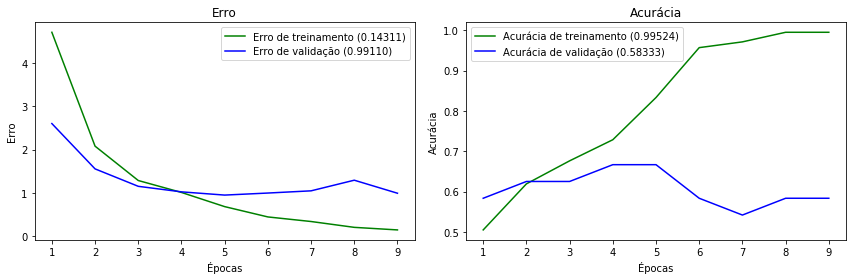

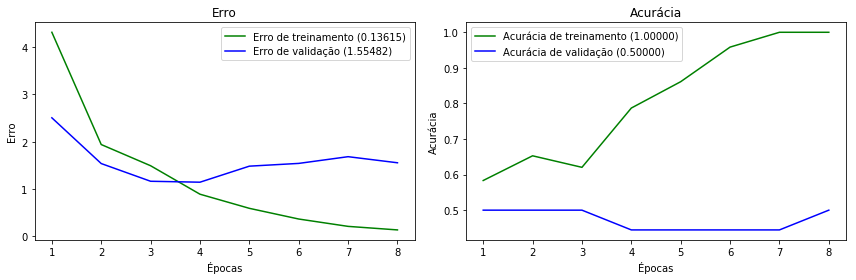

Training: 	0.7862 loss / 0.8102 acc
Validation: 	1.0463 loss / 0.5556 acc


In [5]:
with open('./Reports_grid/it/brmoral_pt/histories.pkl','rb') as f:
    h = pickle.load(f)
    histories = np.array(h)
    plot_history(histories[0])
    plot_history(histories[1])
    train_val_metrics(histories)
    #plot_history(histories[2])

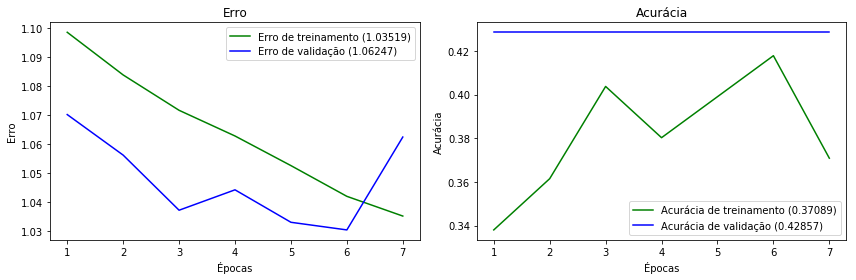

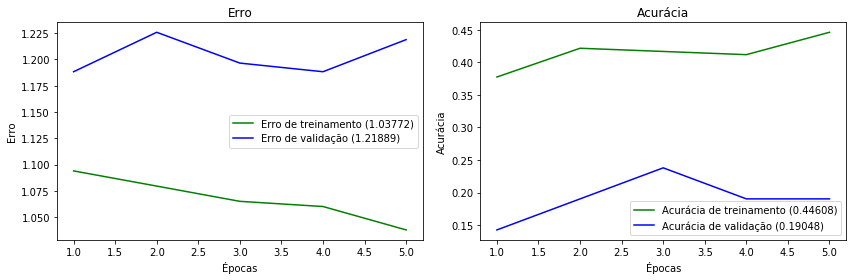

IndexError: index 2 is out of bounds for axis 0 with size 2

In [6]:
with open('./Reports/age/b5post_pt/histories.pkl','rb') as f:
    h = pickle.load(f)
    histories = np.array(h)
    plot_history(histories[0])
    plot_history(histories[1])
    plot_history(histories[2])

In [ ]:
with open('./Reports/gender/pan13_en/histories.pkl','rb') as f:
    h = pickle.load(f)
    histories = np.array(h)
    plot_history(histories[0])
    plot_history(histories[1])
    plot_history(histories[2])

In [ ]:
np.zeros(100)

In [41]:
from Models.functions.datasets import loadTrainTest

In [42]:
!ls ./Grid

b5post__grid.csv     brmoral__grid.csv	esic__grid.csv	 smscorpus__grid.csv
brblogset__grid.csv  enblog__grid.csv	pan13__grid.csv


In [65]:
#pan13__grid.csv
import pandas as pd
import ast
def getReports(dataset_name, sort=False, task=None):
    params_keys = ['dropout_rate', 'embedding_dim', 'max_seq_length', 'strides', 'n_classes', 'features_maps', 'epochs', 'batch_size', 'max_num_words', 'kernel_size','lr','optimizer']#,'pool_size']
    def split_params(x, key):
        x = ast.literal_eval(x)
        
        return x[key] if key in x else 0

    rp = pd.read_csv('./Grid/'+dataset_name+'__grid.csv')
    
    for p in params_keys:    
        rp[p] = rp['params'].apply( split_params, key=p)
    rp = rp.drop(['params'],axis=1)

    rp = rp.filter(['dataset','task','lang','f1','loss','val_loss', 'optimizer','lr','kernel_size','features_maps','embedding_dim','pool_size','dropout_rate','strides','max_num_words','max_seq_length','batch_size','tunning'])
    if task != None:
        rp = rp[(rp['task'] == task)]        
    if sort == True:
        rp = rp.sort_values(['f1'], ascending=False)
    return rp

### PAN CLEF
#### PAN-CLEF: Gender: 0.59 / Age: 0.64

In [66]:
getReports('brmoral', sort=True, task='gender')[:5]

,dataset,task,lang,f1,loss,val_loss,optimizer,lr,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
97,brmoral,gender,pt,0.719170,NaN,NaN,None,0,"[7, 8]","[50, 50]",100,0.2,[1],500,302,8,embedding_dim
104,brmoral,gender,pt,0.713043,NaN,NaN,None,0,"[7, 8]","[50, 50]",100,0.2,[1],500,302,8,test2 embeddings
105,brmoral,gender,pt,0.696067,NaN,NaN,None,0,"[7, 8]","[50, 50]",300,0.2,[1],500,302,8,test2 embeddings
95,brmoral,gender,pt,0.690044,NaN,NaN,None,0,"[7, 8]","[50, 50]",300,0.2,[1],500,302,8,embedding_dim
71,brmoral,gender,pt,0.682585,NaN,NaN,None,0,"[7, 8]","[50, 50]",100,0.2,[1],500,302,8,NaN


In [13]:
getReports('brmoral', sort=True, task='age')[:5]

,dataset,task,lang,f1,loss,val_loss,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
102,brmoral,age,pt,0.412616,NaN,NaN,"[7, 8]","[50, 50]",600,0.2,[1],500,302,8,embedding_dim
101,brmoral,age,pt,0.407934,NaN,NaN,"[7, 8]","[50, 50]",300,0.2,[1],500,302,8,embedding_dim
100,brmoral,age,pt,0.405822,NaN,NaN,"[7, 8]","[50, 50]",100,0.2,[1],500,302,8,embedding_dim
99,brmoral,age,pt,0.387701,NaN,NaN,"[7, 8]","[50, 50]",10,0.2,[1],500,302,8,embedding_dim
103,brmoral,age,pt,0.378859,NaN,NaN,"[7, 8]","[50, 50]",1000,0.2,[1],500,302,8,embedding_dim


In [14]:
getReports('brmoral', sort=True, task='education')[:5]

,dataset,task,lang,f1,loss,val_loss,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
127,brmoral,education,pt,0.367805,0.641655,1.614437,"[7, 8]","[50, 50]",100,0.20,[1],500,302,8,nilc
130,brmoral,education,pt,0.347481,1.397318,1.677661,"[7, 8]","[50, 50]",1000,0.20,[1],500,302,8,nilc
3,brmoral,education,pt,0.344252,NaN,NaN,[3],[10],100,0.25,[1],6664,302,30,NaN
126,brmoral,education,pt,0.315701,0.500821,1.432370,"[7, 8]","[50, 50]",50,0.20,[1],500,302,8,nilc
129,brmoral,education,pt,0.306037,1.742282,1.671864,"[7, 8]","[50, 50]",600,0.20,[1],500,302,8,nilc


In [15]:
getReports('brmoral', sort=True, task='religion')[:5]

,dataset,task,lang,f1,loss,val_loss,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
112,brmoral,religion,pt,0.375490,NaN,NaN,"[7, 8]","[50, 50]",1000,0.2,[1],500,302,8,test2 embeddings
113,brmoral,religion,pt,0.348166,NaN,NaN,"[7, 8]","[50, 50]",100,0.2,[1],500,302,8,create_cnn
110,brmoral,religion,pt,0.345938,NaN,NaN,"[7, 8]","[50, 50]",300,0.2,[1],500,302,8,test2 embeddings
111,brmoral,religion,pt,0.342576,NaN,NaN,"[7, 8]","[50, 50]",600,0.2,[1],500,302,8,test2 embeddings
109,brmoral,religion,pt,0.340353,NaN,NaN,"[7, 8]","[50, 50]",100,0.2,[1],500,302,8,test2 embeddings


In [16]:
getReports('brmoral', sort=True, task='it')[:5]

,dataset,task,lang,f1,loss,val_loss,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
118,brmoral,it,pt,0.673774,NaN,NaN,"[7, 8]","[50, 50]",300,0.2,[1],500,302,8,create_cnn
125,brmoral,it,pt,0.655969,NaN,NaN,"[7, 8]","[50, 50]",1000,0.2,[1],500,302,8,nilc
119,brmoral,it,pt,0.642855,NaN,NaN,"[7, 8]","[50, 50]",600,0.2,[1],500,302,8,create_cnn
123,brmoral,it,pt,0.638848,NaN,NaN,"[7, 8]","[50, 50]",300,0.2,[1],500,302,8,nilc
120,brmoral,it,pt,0.632790,NaN,NaN,"[7, 8]","[50, 50]",1000,0.2,[1],500,302,8,create_cnn


In [11]:
getReports('brmoral', sort=True, task='politics')[:5]

,dataset,task,lang,f1,loss,val_loss,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
5,brmoral,politics,pt,0.301516,NaN,NaN,[3],[10],100,0.25,[1],6664,302,30,NaN
11,brmoral,politics,pt,0.287269,NaN,NaN,[3],[10],100,0.25,[1],6697,302,30,NaN


In [17]:
getReports('b5post', sort=True, task='gender')[:5]

,dataset,task,lang,f1,loss,val_loss,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
34,b5post,gender,pt,0.794185,0.335139,0.665057,"[7, 8]","[10, 10]",100,0.2,[1],1000,2069,2,embeddings
50,b5post,gender,pt,0.746351,0.534074,0.536900,"[1, 2]","[10, 10]",100,0.2,[1],1000,2025,2,kernel
35,b5post,gender,pt,0.713558,0.667075,0.717384,"[7, 8]","[10, 10]",300,0.2,[1],1000,2121,2,embeddings
42,b5post,gender,pt,0.710318,0.518390,0.585263,"[7, 8]","[10, 10]",100,0.2,[1],1000,2058,2,embeddings
18,b5post,gender,pt,0.706266,0.625867,0.682129,"[7, 8]","[10, 10]",100,0.2,[1],1000,100,2,global2 - max-pooling


In [20]:
getReports('b5post', sort=True, task='age')[:5]

,dataset,task,lang,f1,loss,val_loss,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
60,b5post,age,pt,0.553896,0.951475,1.167148,"[3, 4, 5]","[10, 10, 10]",100,0.2,"[1, 1, 1]",1000,1957,2,3 channels
58,b5post,age,pt,0.532408,0.911090,1.156226,"[3, 4, 5]","[10, 10, 10]",100,0.2,"[1, 1, 1]",1000,1957,2,3 channels
55,b5post,age,pt,0.498438,0.911913,1.162135,"[3, 4]","[10, 10]",100,0.2,[1],1000,1957,2,kernel
53,b5post,age,pt,0.495090,0.967213,1.160860,"[3, 4]","[10, 10]",100,0.2,[1],1000,1957,2,kernel
37,b5post,age,pt,0.477256,1.151259,1.165461,"[7, 8]","[10, 10]",300,0.2,[1],1000,2121,2,embeddings


In [19]:
getReports('b5post', sort=True, task='religion')[:5]

,dataset,task,lang,f1,loss,val_loss,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
57,b5post,religion,pt,0.524593,0.979387,1.244546,"[3, 4, 5]","[10, 10, 10]",100,0.2,"[1, 1, 1]",1000,1957,2,3 channels
59,b5post,religion,pt,0.516273,0.847915,1.168847,"[3, 4, 5]","[10, 10, 10]",100,0.2,"[1, 1, 1]",1000,1957,2,3 channels
46,b5post,religion,pt,0.515247,0.914691,0.952531,"[7, 8]","[10, 10]",100,0.2,[1],1000,2058,2,embeddings
61,b5post,religion,pt,0.470402,0.921378,0.778720,"[3, 4, 5]","[10, 10, 10]",100,0.2,"[1, 1, 1]",1000,1957,2,3 channels
39,b5post,religion,pt,0.469954,0.807163,1.046795,"[7, 8]","[10, 10]",300,0.2,[1],1000,2121,2,embeddings


In [18]:
getReports('b5post', sort=True, task='it')[:5]

,dataset,task,lang,f1,loss,val_loss,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
17,b5post,it,pt,0.705966,0.674611,0.730481,"[7, 8]","[10, 10]",100,0.2,[1],1000,100,2,max-pooling
40,b5post,it,pt,0.665405,0.722695,0.722451,"[7, 8]","[10, 10]",100,0.2,[1],1000,2069,2,embeddings
41,b5post,it,pt,0.661718,0.553975,0.650211,"[7, 8]","[10, 10]",300,0.2,[1],1000,2121,2,embeddings
31,b5post,it,pt,0.657306,0.786700,0.765654,"[7, 8]","[10, 10]",100,0.2,[1],1000,100,2,embeddings
49,b5post,it,pt,0.641852,0.709649,0.685212,"[7, 8]","[10, 10]",300,0.2,[1],1000,1925,2,embeddings


In [22]:
getReports('brblogset', sort=True, task='gender')[:5]

,dataset,task,lang,f1,loss,val_loss,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
10,brblogset,gender,pt,0.723986,0.412746,0.495024,"[3, 4]","[40, 40]",100,0.2,"[1, 1, 1]",1000,3504,2,3 channels
2,brblogset,gender,pt,0.712064,0.549661,0.631382,[3],[40],100,0.2,"[1, 1, 1]",1000,3349,2,3 channels
8,brblogset,gender,pt,0.698008,0.639000,0.634858,"[3, 4]","[10, 10]",100,0.2,"[1, 1, 1]",1000,3182,2,3 channels
1,brblogset,gender,pt,0.693917,0.464546,0.573300,[3],[10],100,0.2,"[1, 1, 1]",148873,3407,2,3 channels
6,brblogset,gender,pt,0.686222,0.831787,0.710043,[7],[40],100,0.2,"[1, 1, 1]",1000,3248,2,3 channels


In [75]:
getReports('brblogset', sort=True, task='age')[:5]

,dataset,task,lang,f1,loss,val_loss,optimizer,lr,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
60,brblogset,age,pt,0.446305,1.087552,1.078819,None,0.0,"[7, 8]","[10, 10]",100,0.2,"[1, 1, 1]",1000,3481,2,3 channels
27,brblogset,age,pt,0.440853,1.037971,1.066611,None,0.0,[7],[40],100,0.2,"[1, 1, 1]",1000,3192,2,3 channels
46,brblogset,age,pt,0.439764,1.091692,1.099941,None,0.0,"[3, 4]","[40, 40]",100,0.2,"[1, 1, 1]",1000,3392,2,3 channels
38,brblogset,age,pt,0.436890,1.060538,1.074856,None,0.0,"[7, 8]","[40, 40]",100,0.2,"[1, 1, 1]",1000,3337,2,3 channels
87,brblogset,age,pt,0.431568,1.018683,1.064179,None,0.0,[2],[40],100,0.2,"[1, 1, 1]",10000,3214,2,3 channels


In [96]:
getReports('brblogset', sort=True, task='education')[:5]

,dataset,task,lang,f1,loss,val_loss,optimizer,lr,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
174,brblogset,education,pt,0.384225,1.098652,2.101602,rmsprop,0.00001,"[3, 4]","[100, 100]",100,0.2,"[1, 1]",15000,3224,32,x3 tuning optimizer and lr
160,brblogset,education,pt,0.379478,0.818013,1.593754,rmsprop,0.00010,"[3, 4]","[50, 50]",100,0.1,"[1, 1]",15000,3224,32,x3 tuning optimizer and lr
184,brblogset,education,pt,0.364372,1.197085,1.714234,rmsprop,0.00001,"[3, 4]","[100, 100]",100,0.5,"[1, 1]",15000,3224,32,x3 tuning optimizer and lr
186,brblogset,education,pt,0.359442,1.153883,1.984992,adam,0.00001,"[3, 4]","[100, 100]",100,0.5,"[1, 1]",15000,3224,32,x3 tuning optimizer and lr
157,brblogset,education,pt,0.356877,0.272314,1.532260,adam,0.00010,"[3, 4]","[50, 50]",100,0.1,"[1, 1]",15000,3224,32,x3 tuning optimizer and lr


In [52]:
getReports('esic', sort=True, task='gender')[:5]

,dataset,task,lang,f1,loss,val_loss,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
47,esic,gender,pt,0.665670,0.632565,0.719228,"[3, 4, 5]","[40, 40, 40]",100,0.2,"[1, 1, 1]",1000,111,2,3 channels
32,esic,gender,pt,0.629122,0.533877,0.720169,[3],[40],100,0.2,"[1, 1, 1]",7901,75,2,3 channels
52,esic,gender,pt,0.621898,0.759052,0.762565,"[7, 8, 9]","[40, 40, 40]",100,0.2,"[1, 1, 1]",7137,89,2,3 channels
46,esic,gender,pt,0.621566,0.658149,0.735229,"[3, 4, 5]","[10, 10, 10]",100,0.2,"[1, 1, 1]",6907,74,2,3 channels
31,esic,gender,pt,0.612341,0.694655,0.737753,[3],[40],100,0.2,"[1, 1, 1]",1000,65,2,3 channels


In [53]:
getReports('esic', sort=True, task='age')[:5]

,dataset,task,lang,f1,loss,val_loss,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
74,esic,age,pt,0.460495,1.145978,1.167068,"[7, 8, 9]","[10, 10, 10]",100,0.2,"[1, 1, 1]",6743,71,2,3 channels
64,esic,age,pt,0.448469,1.176864,1.261947,"[3, 4]","[40, 40]",100,0.2,"[1, 1, 1]",7012,81,2,3 channels
61,esic,age,pt,0.445914,1.100253,1.152469,"[3, 4]","[10, 10]",100,0.2,"[1, 1, 1]",1000,84,2,3 channels
71,esic,age,pt,0.443142,1.020301,1.140621,"[3, 4, 5]","[40, 40, 40]",100,0.2,"[1, 1, 1]",1000,111,2,3 channels
60,esic,age,pt,0.441942,1.216825,1.229365,[7],[40],100,0.2,"[1, 1, 1]",6496,66,2,3 channels


In [77]:
getReports('esic', sort=True, task='education')[:5]

,dataset,task,lang,f1,loss,val_loss,optimizer,lr,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
441,esic,education,pt,0.532099,0.874927,0.960662,rmsprop,0.00001,"[3, 4]","[50, 50]",100,0.1,"[1, 1]",15000,91,32,x3 tuning optimizer and lr
440,esic,education,pt,0.529571,0.908753,0.964460,rmsprop,0.00010,"[3, 4]","[50, 50]",100,0.1,"[1, 1]",15000,91,32,x3 tuning optimizer and lr
445,esic,education,pt,0.527443,0.881931,0.971273,adam,0.00001,"[3, 4]","[50, 50]",100,0.1,"[1, 1]",15000,91,32,x3 tuning optimizer and lr
198,esic,education,pt,0.518897,0.973900,0.983793,None,0.00000,"[2, 4]","[50, 50]",100,0.1,"[1, 1, 1]",15000,91,32,tuning params w2v 100
184,esic,education,pt,0.516467,0.957053,0.977753,None,0.00000,"[3, 4, 5]","[10, 10, 10]",100,0.1,"[1, 1, 1]",15000,91,32,tuning params w2v 100


In [78]:
getReports('esic', sort=True, task='profession')[:5]

,dataset,task,lang,f1,loss,val_loss,optimizer,lr,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
447,esic,profession,pt,0.470412,1.124487,1.230173,rmsprop,0.00001,"[3, 4]","[50, 50]",100,0.1,"[1, 1]",15000,91,32,x3 tuning optimizer and lr
446,esic,profession,pt,0.470185,1.119430,1.182709,rmsprop,0.00010,"[3, 4]","[50, 50]",100,0.1,"[1, 1]",15000,91,32,x3 tuning optimizer and lr
451,esic,profession,pt,0.461029,1.112756,1.228102,adam,0.00001,"[3, 4]","[50, 50]",100,0.1,"[1, 1]",15000,91,32,x3 tuning optimizer and lr
450,esic,profession,pt,0.459487,1.164709,1.234998,adam,0.00010,"[3, 4]","[50, 50]",100,0.1,"[1, 1]",15000,91,32,x3 tuning optimizer and lr
276,esic,profession,pt,0.452652,1.212175,1.246717,None,0.00000,[3],[50],100,0.1,"[1, 1, 1]",15000,91,32,tuning params w2v 100


In [79]:
getReports('esic', sort=True, task='region')[:5]

,dataset,task,lang,f1,loss,val_loss,optimizer,lr,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
452,esic,region,pt,0.373765,1.305718,1.357787,rmsprop,0.00010,"[3, 4]","[50, 50]",100,0.1,"[1, 1]",15000,91,32,x3 tuning optimizer and lr
456,esic,region,pt,0.364820,1.341028,1.386571,adam,0.00010,"[3, 4]","[50, 50]",100,0.1,"[1, 1]",15000,91,32,x3 tuning optimizer and lr
453,esic,region,pt,0.359248,1.301013,1.385526,rmsprop,0.00001,"[3, 4]","[50, 50]",100,0.1,"[1, 1]",15000,91,32,x3 tuning optimizer and lr
427,esic,region,pt,0.339916,1.395757,1.388131,None,0.00000,"[2, 3, 4]","[50, 50, 50]",100,0.1,"[1, 1, 1]",15000,98,10,tuning params w2v 100
457,esic,region,pt,0.332135,1.338815,1.399243,adam,0.00001,"[3, 4]","[50, 50]",100,0.1,"[1, 1]",15000,91,32,x3 tuning optimizer and lr


In [80]:
getReports('esic', sort=True, task='city')[:5]

,dataset,task,lang,f1,loss,val_loss,optimizer,lr,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
166,esic,city,pt,0.603171,0.755501,0.763184,None,0.0,"[3, 4, 5]","[10, 10, 10]",100,0.2,"[1, 1, 1]",6907,74,2,3 channels
155,esic,city,pt,0.591485,0.736834,0.727701,None,0.0,[7],[40],100,0.2,"[1, 1, 1]",1000,92,2,3 channels
153,esic,city,pt,0.567893,0.630706,0.654323,None,0.0,[7],[10],100,0.2,"[1, 1, 1]",1000,95,2,3 channels
162,esic,city,pt,0.566569,0.777795,0.745692,None,0.0,"[7, 8]","[10, 10]",100,0.2,"[1, 1, 1]",8120,91,2,3 channels
159,esic,city,pt,0.564191,0.723761,0.795197,None,0.0,"[3, 4]","[40, 40]",100,0.2,"[1, 1, 1]",1000,116,2,3 channels


In [48]:
getReports('pan13', sort=True, task='gender')[:5]

,dataset,task,lang,f1,loss,val_loss,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
4,pan13,gender,en,0.515005,0.694807,0.690842,"[7, 8, 9]","[10, 10, 10]",100,0.2,[1],10000,423,2,test channels
11,pan13,gender,en,0.509470,0.691336,0.691297,"[7, 8]","[10, 10]",100,0.2,[1],104548,200,2,test channels
17,pan13,gender,en,0.507661,0.694685,0.684922,"[7, 8]","[50, 50]",100,0.2,[1],105421,200,2,test channels
13,pan13,gender,en,0.505204,0.695849,0.693970,"[7, 8]","[50, 50]",100,0.2,[1],1000,200,2,test channels
15,pan13,gender,en,0.458513,0.695970,0.688796,"[7, 8]","[50, 50]",100,0.2,[1],10000,200,2,test channels


In [32]:
getReports('pan13', sort=True, task='age')[:5]

,dataset,task,lang,f1,loss,val_loss,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
113,pan13,age,en,0.618505,0.842402,0.850216,"[2, 3, 4]","[50, 50, 50]",100,0.2,[1],1000,409,2,test channels
114,pan13,age,en,0.617788,0.850759,0.879600,"[2, 3, 4]","[50, 50, 50]",100,0.2,[1],10000,200,2,test channels
103,pan13,age,en,0.610357,0.836835,0.799793,"[2, 3]","[50, 50]",100,0.2,[1],10000,415,2,test channels
48,pan13,age,en,0.602978,0.865463,0.828639,"[3, 4, 5]","[50, 50, 50]",100,0.2,[1],10000,200,2,test channels
73,pan13,age,en,0.601167,0.872222,0.843927,[3],[50],100,0.2,[1],10000,418,2,test channels


In [61]:
getReports('enblog', sort=True, task='gender')[:5]

,dataset,task,lang,f1,loss,val_loss,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
45,enblog,gender,en,0.721580,0.588780,0.552338,"[3, 3]","[10, 10]",100,0.2,[1],1000,1000,4,NaN
40,enblog,gender,en,0.720872,0.687490,0.584803,[3],[10],100,0.2,[1],10000,3906,4,NaN
47,enblog,gender,en,0.719113,0.702937,0.596921,"[3, 3]","[10, 10]",300,0.2,[1],1000,1000,4,embedding downloaded
39,enblog,gender,en,0.715373,0.567603,0.595078,[3],[10],100,0.2,[1],10000,1000,4,NaN
64,enblog,gender,en,0.715212,0.592798,0.636496,[8],[50],100,0.2,[1],10000,3906,4,test channels


In [67]:
getReports('enblog', sort=True, task='age')[:5]

,dataset,task,lang,f1,loss,val_loss,optimizer,lr,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
138,enblog,age,en,0.778422,0.418142,0.677523,rmsprop,0.0001,"[3, 4]","[50, 50]",100,0.1,"[1, 1]",15000,3897,32,x2 tuning optimizer and lr
115,enblog,age,en,0.772129,0.482284,0.630504,adadelta,0.1000,"[3, 4]","[50, 50]",100,0.1,"[1, 1]",15000,3897,32,tuning optimizer and lr
126,enblog,age,en,0.766266,0.539417,0.744338,adadelta,0.1000,"[3, 4]","[50, 50]",100,0.1,"[1, 1]",15000,3897,32,x2 tuning optimizer and lr
133,enblog,age,en,0.759957,0.478192,0.706113,adam,0.0001,"[3, 4]","[50, 50]",100,0.1,"[1, 1]",15000,3897,32,x2 tuning optimizer and lr
111,enblog,age,en,0.759062,0.547275,0.700160,adadelta,0.1000,"[3, 4]","[50, 50]",100,0.1,"[1, 1]",15000,3897,32,tuning optimizer and lr


In [ ]:
adadelta  0.1, 
adam 0.0001, 0.001
adadelta 0.1
adam 0.0001
rmsprop 0.0001

In [49]:
getReports('smscorpus', sort=True, task='gender')[:5]

,dataset,task,lang,f1,loss,val_loss,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
89,smscorpus,gender,en,0.655474,0.630732,0.647252,"[3, 4, 5]","[10, 10, 10]",100,0.2,[1],4309,50,2,test channels
53,smscorpus,gender,en,0.652193,0.634811,0.665229,"[2, 3]","[10, 10]",100,0.2,[1],4502,50,2,test channels
77,smscorpus,gender,en,0.651242,0.612268,0.646604,"[7, 8]","[10, 10]",100,0.2,[1],4379,50,2,test channels
129,smscorpus,gender,en,0.649970,0.635985,0.643665,[8],[50],100,0.2,[1],10000,50,2,test channels
105,smscorpus,gender,en,0.647285,0.634215,0.649835,"[7, 8, 9]","[50, 50, 50]",100,0.2,[1],10000,50,2,test channels


In [50]:
getReports('smscorpus', sort=True, task='age')[:5]

,dataset,task,lang,f1,loss,val_loss,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
5,smscorpus,age,en,0.524103,0.978348,0.876987,"[2, 3]","[10, 10]",100,0.2,[1],4171,50,2,test channels
18,smscorpus,age,en,0.488862,0.986791,0.951409,"[2, 3, 4]","[50, 50, 50]",100,0.2,[1],1000,200,2,test channels
13,smscorpus,age,en,0.477225,0.910854,0.964932,"[2, 3, 4]","[10, 10, 10]",100,0.2,[1],1000,50,2,test channels
6,smscorpus,age,en,0.447809,0.881178,1.016459,"[2, 3]","[50, 50]",100,0.2,[1],1000,200,2,test channels
22,smscorpus,age,en,0.444899,0.952598,1.035583,"[2, 3, 4]","[50, 50, 50]",100,0.2,[1],4306,200,2,test channels


### Compare Optimizer

In [83]:
!ls 'Reports_grid_adam'

education


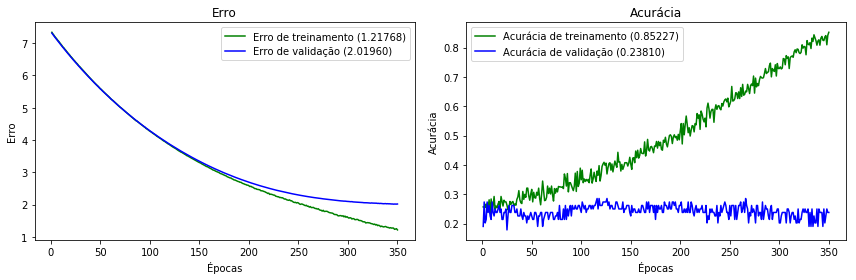

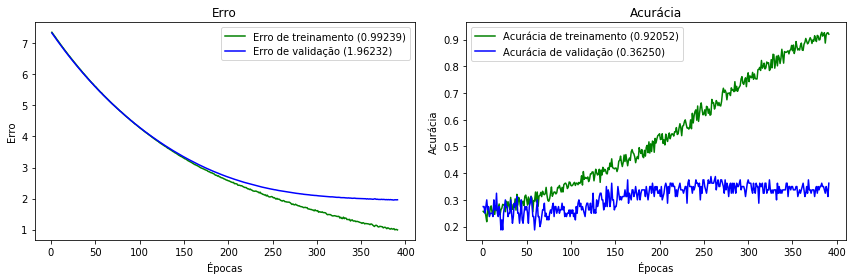

In [92]:
#pan13__grid.csv

with open('./Reports_grid_adam/education/brblogset_pt/histories.pkl','rb') as f:
    h = pickle.load(f)
    histories = np.array(h)
    plot_history(histories[0])
    plot_history(histories[1])
    #plot_history(histories[2])

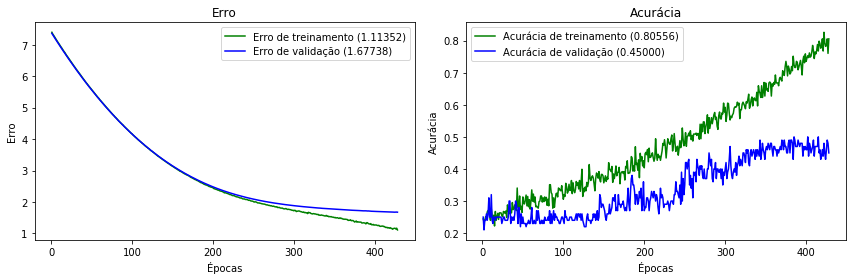

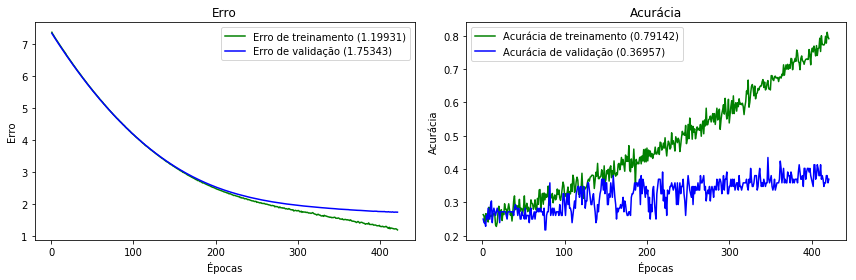

In [93]:
with open('./Reports_grid_rmsprop/education/brblogset_pt/histories.pkl','rb') as f:
    h = pickle.load(f)
    histories = np.array(h)
    plot_history(histories[0])
    plot_history(histories[1])
    #plot_history(histories[2])